## 02427 Advanced Time Series Analysis
### Computer exercise 2

In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import least_squares

from IPython.display import Markdown as md
import matplotlib.pyplot as plt

%matplotlib inline

Ensure reproducability

In [2]:
np.random.seed(seed=42)

### Part 1

In [232]:
def setar(N):
    r = np.random.randn(N)
    y = np.empty(N)
    y[0] = r[0]
    for t in range(1, N):
        if y[t-1] < 100:
            y[t] = .2 + y[t-1] + r[t]
        else:
            y[t] = 50 + 0.5*y[t-1] + r[t]
    return y, r

In [233]:
dat = np.load('../ex1/setar_2_1_1.npy')
x = np.arange(dat.shape[0])
r = dat[:,0]
y_setar = dat[:,1]

In [196]:
# Ensure reproducability
np.random.seed(seed=42)
# Run N simulations
y_setar, r = setar(1000)

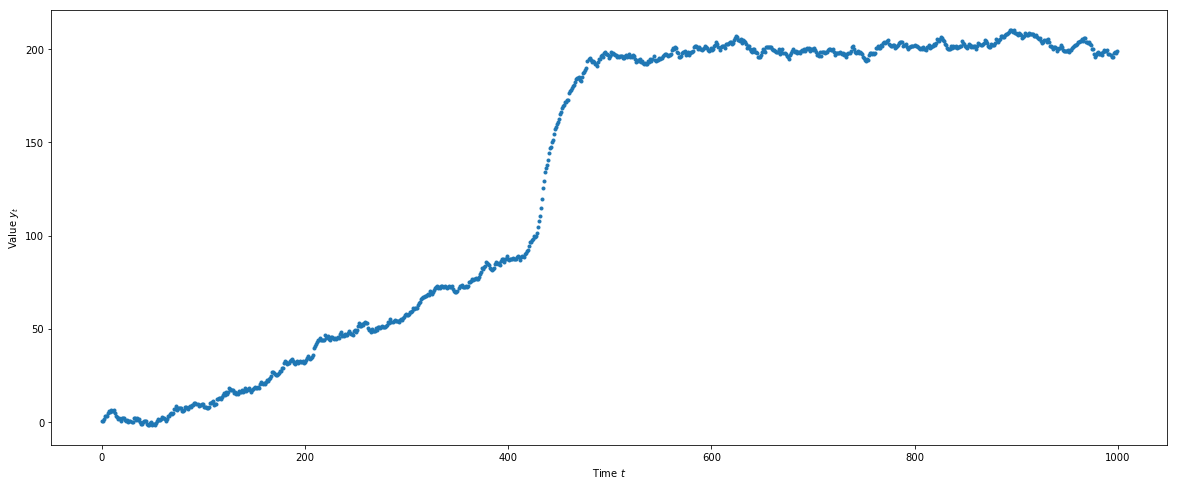

In [234]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(x, y_setar, marker = '.', linestyle = '')
None

In [235]:
fig.savefig("plots/setar_2_1_1.pdf", bbox_inches='tight')

We start by define our $\text{SETAR}(2, 1, 1)$ model such that the slope coefficients of each regime are paramized using $\theta_0$ and $\theta_1$.

In [236]:
def setar_slope(theta, x, r):
    assert len(x) == len(r)
    y = np.empty_like(r)
    y[0] = r[0]
    for t in range(1, len(x)):
        if y[t-1] < 100:
            y[t] = .2 + theta[0] * y[t-1] + r[t]
        else:
            y[t] = 10 + theta[1] * y[t-1] + r[t]
    return  y

We define our residual function taking all the parameters of the above $\text{SETAR}$ function, as well as the true $y$ values.

In [237]:
def residuals_slope(theta, x, r, y):
    return setar_slope(theta, x, r) - y

Our initial guess is that both values are 0.

In [238]:
theta_init = [0, 0]

In [239]:
res = least_squares(residuals_slope, theta_init, args=(x, r, y_setar), verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1629e+07                                    2.96e+04    
       1              2         7.5497e+06      4.08e+06       1.00e+00       3.74e+08    
       2              4         4.5226e+06      3.03e+06       4.15e-01       8.62e+08    
       3              5         2.9896e+06      1.53e+06       4.15e-01       4.87e+08    
       4              7         2.9320e+06      5.76e+04       4.63e-02       8.98e+07    
       5             11         2.9290e+06      2.99e+03       1.81e-04       8.75e+07    
       6             12         2.9274e+06      1.58e+03       4.52e-05       8.76e+07    
       7             14         2.9272e+06      1.93e+02       1.13e-05       8.75e+07    
       8             15         2.9264e+06      8.39e+02       2.83e-06       8.74e+07    
       9             16         2.9256e+06      7.73e+02       5.65e-06       8.71e+07    

We see the least squares optimization algorithm quickly finds the optimal values:

In [240]:
md(r'$\theta_0$ = {}, $\theta_1$ = {}'.format(*res.x))

$\theta_0$ = 1.0074464779279126, $\theta_1$ = 0.875866248321334

Now we try to estimate the regime change parameter :

In [242]:
def setar_z(theta, x, r):
    assert len(x) == len(r)
    y = np.empty_like(r)
    y[0] = r[0]
    for t in range(1, len(x)):
        if y[t-1] < theta[0]:
            y[t] = .2 + y[t-1] + r[t]
        else:
            y[t] = 10 + .95 * y[t-1] + r[t]
    return  y

In [243]:
def residuals_z(theta, x, r, y):
    return setar_z(theta, x, r) - y

In [244]:
theta_init_z = [0]

In [245]:
res = least_squares(residuals_z, theta_init_z, args=(x, r, y_setar), verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.1584e+06                                    0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 5.1584e+06, final cost 5.1584e+06, first-order optimality 0.00e+00.


### Part 2

In [268]:
def grid_slope(a, b):
    ps_0 = np.linspace(0.99, 1, 21)
    ps_1 = np.linspace(0.90, .95, 21)
    grid = np.empty([len(ps_0), len(ps_1)])
    for i in range(len(ps_0)):
        for k in range(len(ps_1)):
            p_0 = ps_0[i]
            p_1 = ps_1[k]
            grid[k, i] = np.mean(residuals_slope([p_0, p_1], x[a:b], r[a:b], y_setar[a:b])**2)
    return ps_0, ps_1, grid

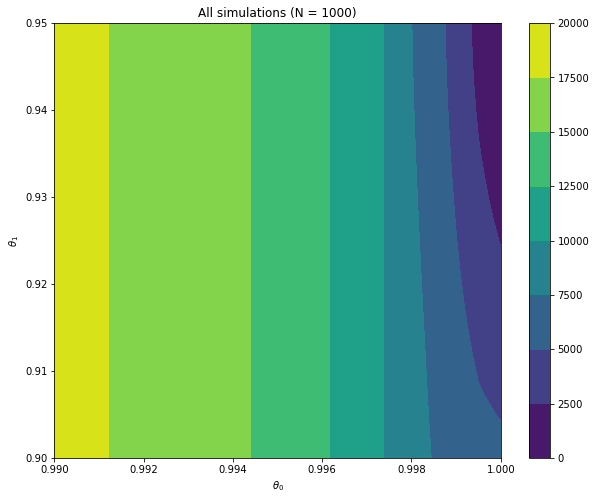

In [269]:
ps_0, ps_1, grid = grid_slope(0, 1000)
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('All simulations (N = 1000)')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
contour_plot = ax.contourf(ps_0, ps_1, grid)
color_bar = fig.colorbar(contour_plot)
fig.savefig("plots/setar_2_1_1_contour_all.pdf", bbox_inches='tight')

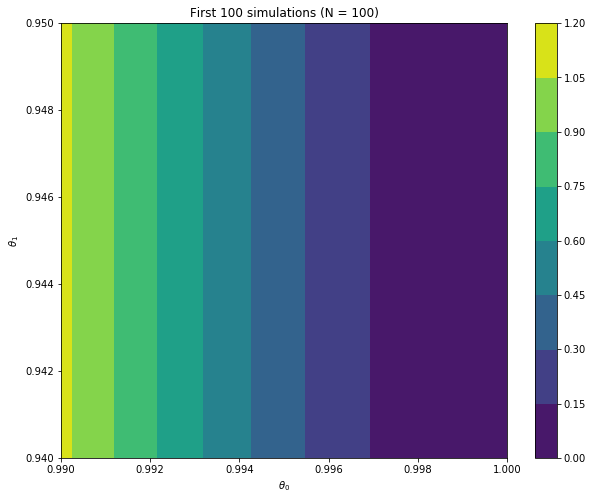

In [267]:
ps_0, ps_1, grid = grid_slope(0, 100)
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('First 100 simulations (N = 100)')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
contour_plot = ax.contourf(ps_0, ps_1, grid)
color_bar = fig.colorbar(contour_plot)
fig.savefig("plots/setar_2_1_1_contour_first.pdf", bbox_inches='tight')

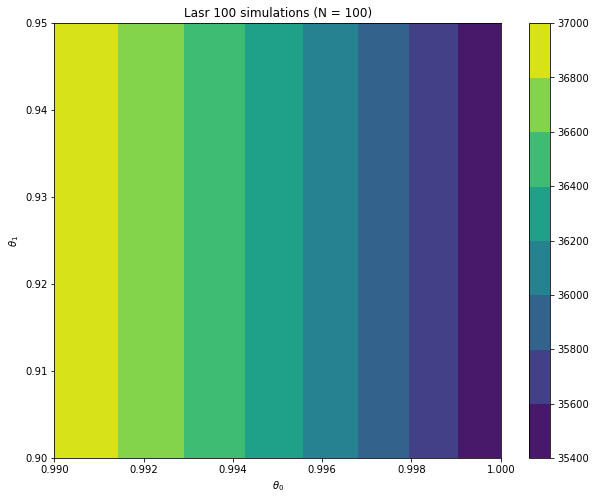

In [260]:
ps_0, ps_1, grid = grid_slope(900, 1000)
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('Lasr 100 simulations (N = 100)')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
contour_plot = ax.contourf(ps_0, ps_1, grid)
color_bar = fig.colorbar(contour_plot)
fig.savefig("plots/setar_2_1_1_contour_last.pdf", bbox_inches='tight')

**TODO**: Discuss your findings in the report.

### Part 3

We choose a Hidden Markov Model:

In [371]:
phi = .95
theta = 0.8
sigma_zeta_sq = .4**2
sigma_epsilon_sq = 2**2

In [374]:
# Ensure reproducability
np.random.seed(seed=42)
N = 100
zeta = np.random.randn(N) * sigma_zeta_sq
epsilon = np.random.randn(N) * sigma_epsilon_sq
X = np.empty([N, 2])
Y = np.empty(N)
X[0] = np.array([zeta[0], 0])
Y[0] = epsilon[0]
for t in range(1, N):
    X[t] = np.dot(np.array([[phi, theta], [0, 1]]), np.array([X[t-1, 0], zeta[t - 1]])) + np.array([[zeta[t], 0]])
    Y[t] = np.matmul(np.array([epsilon[t - 1], 0]), X[t]) + epsilon[t]

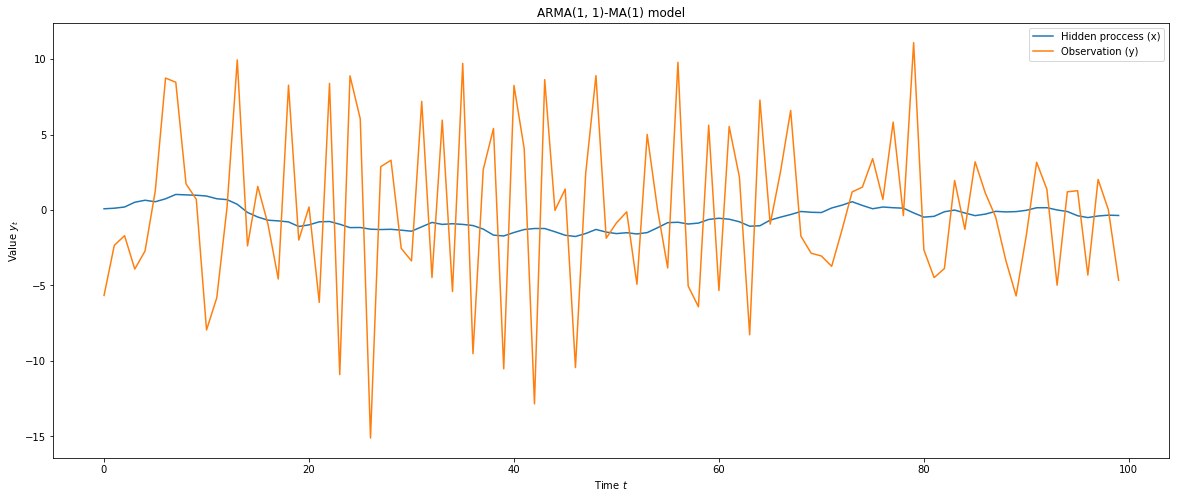

In [380]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title('ARMA(1, 1)-MA(1) model')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(np.arange(N), X[:,0], label = r'Hidden proccess (x)')
ax.plot(np.arange(N), Y, label = r'Observation (y)')
ax.legend()
fig.savefig("plots/arma+ma.pdf", bbox_inches='tight')
None

### Part 4

SyntaxError: invalid syntax (<ipython-input-381-e1362965bb5b>, line 1)

$
\begin{align}
    x_{t+1} &= a x_t + v_t \\
    y_{t} &= x_{t} + e_t \\
\end{align}
$


#### Simulation A

In [130]:
param_a = {
    'a': 0.4,
    'var_v': 1,
    'var_e': 1
}

In [ ]:
run

In [147]:
np.random.seed(seed=42)

N = 1000
t = np.arange(N)
v = np.random.randn(N) * np.sqrt(param_a['var_v'])
e = np.random.randn(N) * np.sqrt(param_a['var_e'])
x = np.empty(N)
x[0] = v[0]
x[1:] = x[:-1] * param_a['a'] + v[1:]
y = x + e

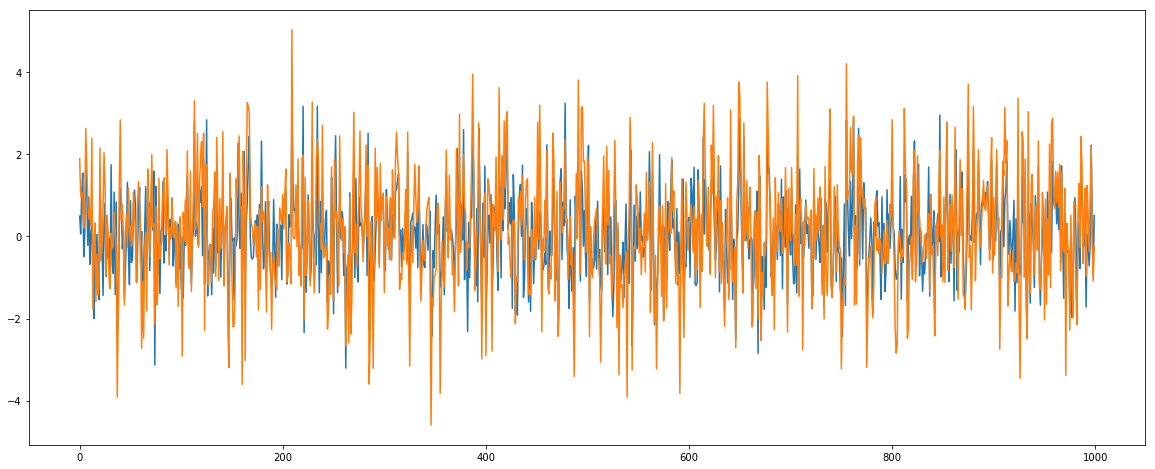

In [148]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(x)
ax.plot(y)